In [1]:
#                                            tools21cm - MIA  

#  /////////////////////////////    Reading and visualising data  //////////////////////////////////////


In [2]:
import numpy as np
import tools21cm as t2c
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data                                 REDSHIFT

path_to_datafiles = './data/'
z = 10

In [4]:
t2c.set_sim_constants(244) # This line is only useful while working with C2Ray simulations.

x_file = t2c.XfracFile(path_to_datafiles+'xfrac3d_7.059.bin')
d_file = t2c.DensityFile(path_to_datafiles+'7.059n_all.dat')

xfrac = x_file.xi
dens  = d_file.cgs_density

In [5]:
#  Visualising the data

import matplotlib.pyplot as plt

In [6]:
box_dims = 244/0.7 # Length of the volume along each direction in Mpc.

dx, dy = box_dims/xfrac.shape[1], box_dims/xfrac.shape[2]
y, x = np.mgrid[slice(dy/2,box_dims,dy),
                slice(dx/2,box_dims,dx)]



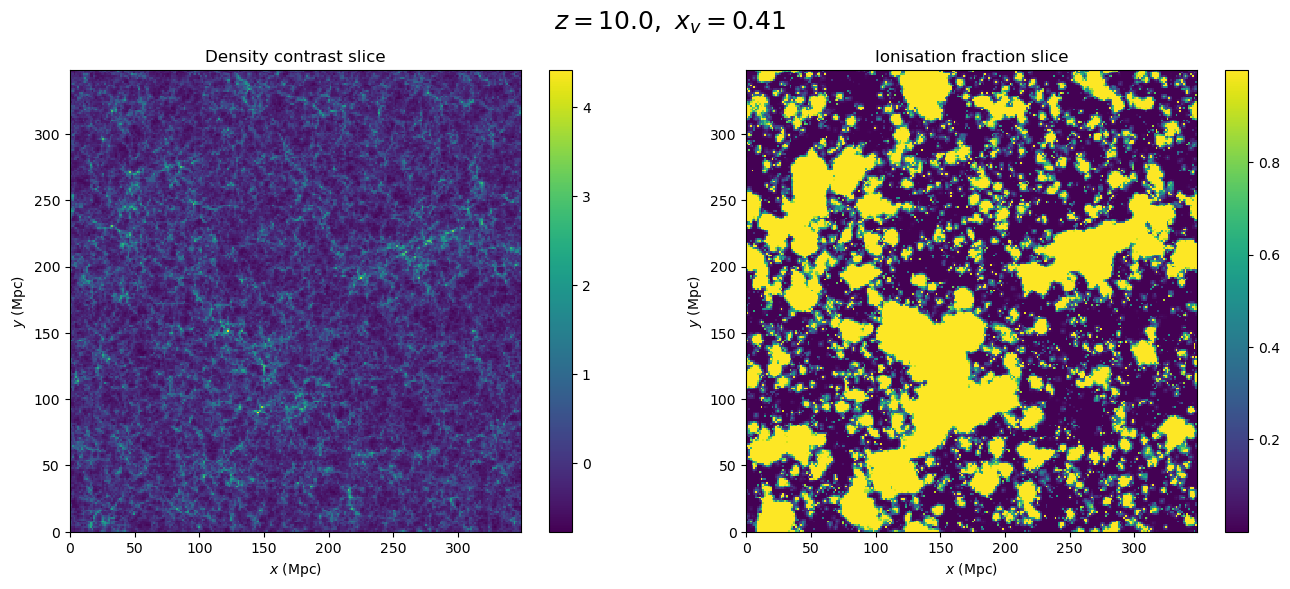

In [7]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.suptitle('$z={0:.1f},~x_v=${1:.2f}'.format(z,xfrac.mean()), size=18)

plt.subplot(121)
plt.title('Density contrast slice')
plt.pcolormesh(x, y, dens[0]/dens.mean()-1)
plt.xlabel('$x$ (Mpc)')
plt.ylabel('$y$ (Mpc)')
plt.colorbar()

plt.subplot(122)
plt.title('Ionisation fraction slice')
plt.pcolormesh(x, y, xfrac[0])
plt.xlabel('$x$ (Mpc)')
plt.ylabel('$y$ (Mpc)')
plt.colorbar()

plt.show()

In [8]:
# ///////////////////////////////    21 cm brightness temperature    /////////////////////////////////////7////

In [9]:
dT = t2c.calc_dt(xfrac, dens, z)
print('Mean of first channel: {0:.4f}'.format(dT[0].mean()))

Mean of first channel: 13.8378


In [10]:
dT_subtracted = t2c.subtract_mean_signal(dT, 0)
print('Mean of first channel: {0:.4f}'.format(dT_subtracted[0].mean()))



Mean of first channel: -0.0000


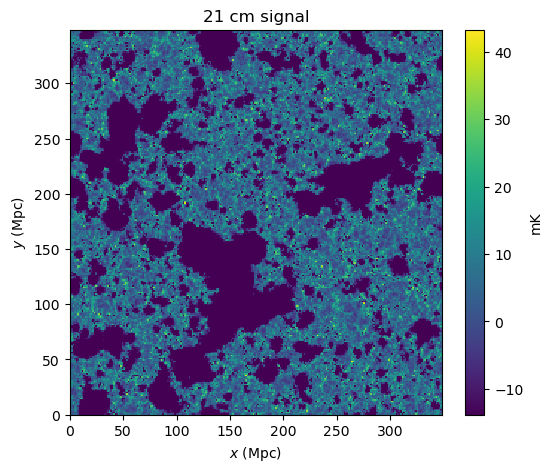

In [11]:
plt.rcParams['figure.figsize'] = [6, 5]


plt.title('21 cm signal')
plt.pcolormesh(x, y, dT_subtracted[0,:,:])
plt.xlabel('$x$ (Mpc)')
plt.ylabel('$y$ (Mpc)')
plt.colorbar(label='mK')

plt.show()


In [12]:
# .............................  21 cm power spectrum  .....................................

In [13]:
box_dims = 244/0.7 # Length of the volume along each direction in Mpc.

In [14]:
ps, ks = t2c.power_spectrum_1d(dT_subtracted, kbins=15, box_dims=box_dims)

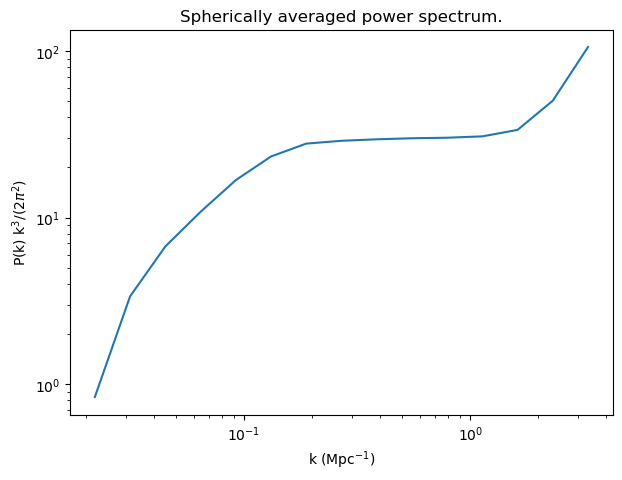

In [15]:

plt.rcParams['figure.figsize'] = [7, 5]

plt.title('Spherically averaged power spectrum.')
plt.loglog(ks, ps*ks**3/2/np.pi**2)
plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')

plt.show()



In [47]:
# ////////////////////////////    Redshift-space distortions   //////////////////////////////////////////////

In [20]:
v_file = t2c.VelocityFile(path_to_datafiles+'7.059v_all.dat')

In [21]:
kms = v_file.get_kms_from_density(d_file)

In [ ]:
dT_rsd = t2c.get_distorted_dt(dT, kms, z,
                              los_axis=0,
                              velocity_axis=0,
                              num_particles=20)

In [2]:
ps_rsd, ks_rsd = t2c.power_spectrum_1d(dT_rsd, kbins=15, box_dims=box_dims)

NameError: name 't2c' is not defined

In [3]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.title('Spherically averaged power spectrum.')
plt.loglog(ks, ps*ks**3/2/np.pi**2, label='no RSD')
plt.loglog(ks_rsd, ps_rsd*ks_rsd**3/2/np.pi**2, linestyle='--', label='RSD')

plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')
plt.legend()

plt.show()

NameError: name 'plt' is not defined

In [ ]:
#  We can calculate using power_spectrum_mu function.

Pk, mubins, kbins, nmode = t2c.power_spectrum_mu(
    dT,
    los_axis=0,
    mubins=8,
    kbins=15,
    box_dims=box_dims,
    exclude_zero_modes=True,
    return_n_modes=True,
    absolute_mus=False,
)


In [ ]:
Pk_rsd, mubins_rsd, kbins_rsd, nmode_rsd = t2c.power_spectrum_mu(
    dT_rsd,
    los_axis=0,
    mubins=8,
    kbins=15,
    box_dims=box_dims,
    exclude_zero_modes=True,
    return_n_modes=True,
    absolute_mus=False,
)



In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]
ii = 8

plt.title('$k={0:.2f}$'.format(kbins[ii]))
plt.plot(mubins, Pk[:,ii], label='no RSD')
plt.plot(mubins_rsd, Pk_rsd[:,ii], linestyle='--', label='RSD')

plt.xlabel('$\mu$')
plt.ylabel('$P(k,\mu)$')
plt.legend()

plt.show()


In [17]:
# //////////////////////////7    Bubble size distribution     ///////////////////////////////7

In [18]:
# we will take the ionisation fraction field and assume all the pixels with value >0.5  as ionised.

xHII = xfrac>0.5

boxsize = 244/0.7 # in Mpc

In [28]:
r_mfp, dn_mfp = t2c.mfp(xHII, boxsize=boxsize, iterations=1000000)

MFP method applied on 3D data (ver 1.0)
Initialising random rays...
...done
Estimating ray lengths...


 48%|███████████████████▌                     | 119/250 [00:17<00:19,  6.82it/s]


...done

Program runtime: 0.338715 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.


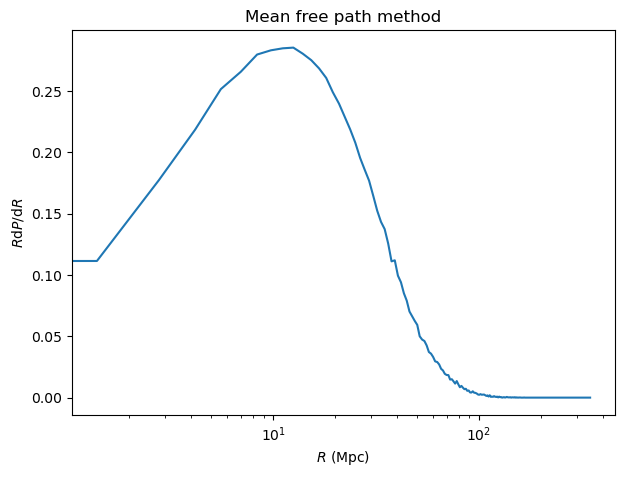

In [29]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.semilogx(r_mfp, dn_mfp)

plt.xlabel('$R$ (Mpc)')
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$')
plt.title('Mean free path method')

plt.show()



In [ ]:
r_spa, dn_spa = t2c.spa(xHII, boxsize=boxsize, nscales=20)

 55%|███████████████████████▋                   | 11/20 [00:54<00:43,  4.83s/it]

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.semilogx(r_spa, dn_spa)

plt.xlabel('$R$ (Mpc)')
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$')
plt.title('Spherical Average method')
plt.show()



In [ ]:
labelled_map, volumes = t2c.fof(xHII)
fof_dist = t2c.plot_fof_sizes(volumes, bins=30, boxsize=boxsize)

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.step(fof_dist[0], fof_dist[1])
plt.xscale('log')
plt.yscale('log')
plt.ylim(fof_dist[2],1)

plt.xlabel('$V$ (Mpc$^3$)')
plt.ylabel('$V^2\mathrm{d}P/\mathrm{d}V$')
plt.title('Friends of friends method')

plt.show()

In [1]:
#  ////////////////////////////////7   Telescope noise calculation  ////////////////////////////////////////////

In [19]:
# uv-coverage  ................................................................


#  ACLRACION:  utiliza el SKA, generan el array con un archivo



#  We start with calculation of the uv-coverage for SKA1-Low configuration.

v, Nant = t2c.get_uv_daily_observation(ncells=dT.shape[0], # The number of cell used to make the image
                                        z=z,                # Redhsift of the slice observed
                                        filename=None,      # If None, it uses the SKA-Low 2016 configuration.
                                        total_int_time=6.0, # Observation per day in hours.
                                        int_time=10.0,      # Time period of recording the data in seconds.
                                        boxsize=boxsize,    # Comoving size of the sky observed
                                        declination=-30.0,
                                        verbose=True)


Making uv map from daily observations.


100%|███████████████████████████████████████| 2159/2159 [06:22<00:00,  5.65it/s]

...done


In [ ]:
np.save(path_to_datafiles+'uv_map.npy', uv)
np.save(path_to_datafiles+'Nant.npy', Nant)

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]

plt.title(r'$z=%.3f$ $\nu_{obs}=%.2f$ MHz' %(z, t2c.z_to_nu(z)))
plt.pcolormesh(x, y, np.log10(np.fft.fftshift(uv)))
plt.xlabel('u [$Mpc^-1$]'), plt.ylabel('v [$Mpc^-1$]');



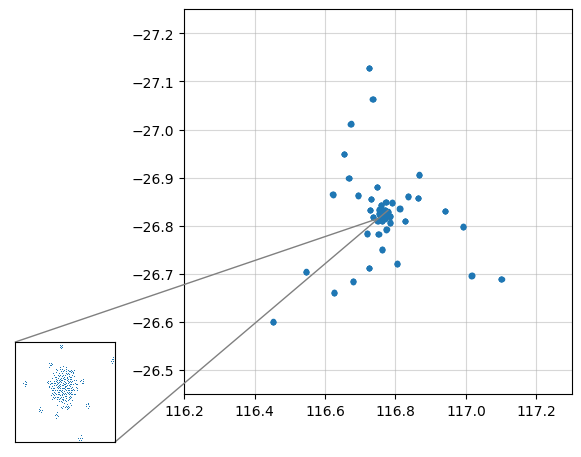

In [21]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ska_ant = t2c.SKA1_LowConfig_Sept2016()

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(ska_ant[:,0], ska_ant[:,1], '.')
x1, x2, y1, y2 = 116.2, 117.3, -26.45, -27.25
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)
ax.grid(b=True, alpha=0.5)

axins = inset_axes(ax, 1, 1, loc=4, bbox_to_anchor=(0.2, 0.2))
plt.plot(ska_ant[:,0], ska_ant[:,1], ',')
x1, x2, y1, y2 = 116.75, 116.78, -26.815, -26.833
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(b=True, alpha=0.5)
mark_inset(ax, axins, loc1=4, loc2=2, fc="none", ec="0.5")
axins.axes.xaxis.set_ticks([]);
axins.axes.yaxis.set_ticks([]);



In [20]:
#   Creating the noise cube

noise_cube = t2c.noise_cube_coeval(ncells=dT.shape[0],
                                   z=z,
                                   depth_mhz=None,   #If None, estimates the value such that the final output is a cube.
                                   obs_time=1000,
                                   filename=None,
                                   boxsize=boxsize,
                                   total_int_time=6.0,
                                   int_time=10.0,
                                   declination=-30.0,
                                   uv_map=uv,
                                   N_ant=Nant,
                                   verbose=True,
                                   fft_wrap=False)



NameError: name 'uv' is not defined

In [ ]:
plt.rcParams['figure.figsize'] = [16, 6]

plt.suptitle('$z=%.3f$ $x_v=%.3f$' %(z, xfrac.mean()), size=18)
plt.subplot(121)
plt.title('noise cube slice')
plt.pcolormesh(x, y, noise_cube[0])
plt.colorbar(label='$\delta T^{noise}$ [mK]')
plt.subplot(122)
plt.title('noise distribution')
plt.hist(noise_cube.flatten(), bins=150, histtype='step');
plt.xlabel('$\delta T^{noise}$ [mK]'), plt.ylabel('$N_{sample}$');

In [22]:
#  Create realistic 21-cm observational images

dT2 = dT_subtracted + noise_cube

dT_smooth = t2c.smooth_coeval(cube=dT2,    # Data cube that is to be smoothed
                              z=z,                  # Redshift of the coeval cube
                              box_size_mpc=boxsize, # Box size in cMpc
                              max_baseline=2.0,     # Maximum baseline of the telescope
                              ratio=1.0,            # Ratio of smoothing scale in frequency direction
                              nu_axis=2)            # frequency axis



NameError: name 'noise_cube' is not defined

NameError: name 'dT_smooth' is not defined

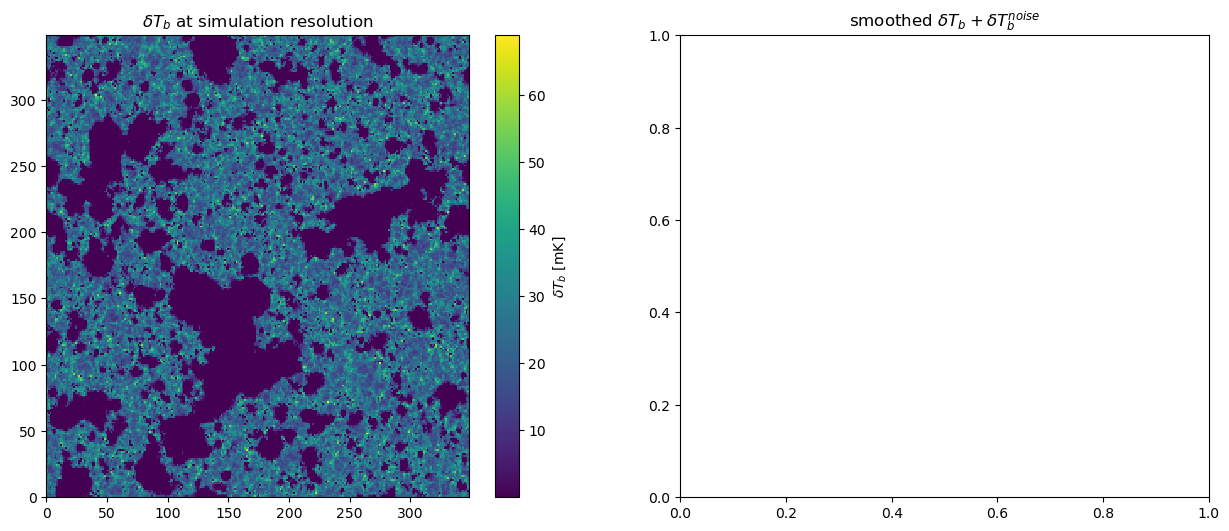

In [23]:
plt.rcParams['figure.figsize'] = [15, 6]

plt.subplot(121)
plt.title('$\delta T_b$ at simulation resolution')
plt.pcolormesh(x, y, dT[0])
plt.colorbar(label='$\delta T_b$ [mK]')
plt.subplot(122)
plt.title('smoothed $\delta T_b + \delta T^{noise}_b$')
plt.pcolormesh(x, y, dT_smooth[0])
plt.colorbar(label='$\delta T_b$ [mK]')

In [24]:
# ///////////////////////////       Image segmenation with Tools21cm   ////////////////////////////////////////

#  The superpixel algorithm

%%time
labels = t2c.slic_cube(cube=dT_smooth,
                       n_segments=5000,
                       compactness=0.1,
                       max_iter=20,
                       sigma=0,
                       min_size_factor=0.5,
                       max_size_factor=3,
                       cmap=None)

UsageError: Line magic function `%%time` not found.


In [ ]:
superpixel_map = t2c.superpixel_map(dT_smooth, labels)

plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(131)
plt.pcolormesh(x, y, superpixel_map[0], cmap='jet')
plt.subplot(132)
plt.pcolormesh(x, y, dT_smooth[0], cmap='jet')


In [ ]:
xHII_stitch = t2c.stitch_superpixels(data=dT_smooth,
                                     labels=labels,
                                     bins='knuth',
                                     binary=True,
                                     on_superpixel_map=True)

mask_xHI = t2c.smooth_coeval(xfrac, z, box_size_mpc=boxsize, max_baseline=2.0, nu_axis=2) < 0.5


In [25]:
from sklearn.metrics import matthews_corrcoef

phicoef_sup = matthews_corrcoef(mask_xHI.flatten(), 1-xHII_stitch.flatten())

plt.rcParams['figure.figsize'] = [12, 6]
plt.subplot(121)
plt.title('Super-Pixel: $r_{\phi}=%.3f$' %phicoef_sup)
plt.pcolormesh(x, y, 1-xHII_stitch[0], cmap='jet')
plt.contour(mask_xHI[0], colors='lime', extent=[0, boxsize, 0, boxsize])


NameError: name 'mask_xHI' is not defined

In [28]:
# ..........   SegU-Net

# Here, we load the best performing network and calculate the nubmer of manipulation on the cube to evaluate the pixel-uncertainty. Additionally, we can get pixel-error maps

#   tta = 0 : super-fast (approximatelly 7 sec), it tends to be a few percent less accurate (within 2% differences), no pixel-error map (no TTA manipulation)
#   tta = 1 : fast (about 17 sec), accurate, with pixel-error map (3 samples)
#   tta = 2 : slow (about 10 min), accurate, with pixel-error map (~100 samples)


In [ ]:
seg = t2c.segmentation.segunet21cm(tta=2, verbose=True)

In [27]:
dT_cut = dT_smooth[:128,:128,:128]
mask_xHI2 = mask_xHI[:128,:128,:128]

xHI_seg, xHI_seg_err = seg.prediction(x=dT_cut)
phicoef_seg = matthews_corrcoef(mask_xHI2.flatten(), xHI_seg.flatten())

xHI_sup = xHII_stitch[:128,:128,:128]
phicoef_sup = matthews_corrcoef(mask_xHI2.flatten(), 1-xHI_sup.flatten())

NameError: name 'dT_smooth' is not defined

NameError: name 'phicoef_sup' is not defined

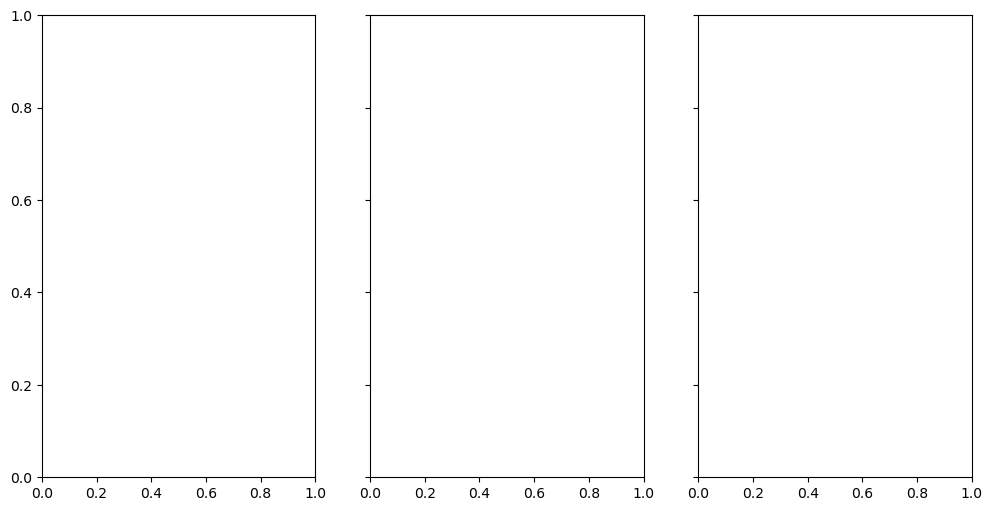

In [26]:
fig, axs = plt.subplots(figsize=(12,6), ncols=3, sharey=True, sharex=True)
(ax0, ax1, ax2) = axs

ax0.set_title('Super-Pixel ($r_{\phi}=%.3f$)' %phicoef_sup)
ax0.imshow(1-xHI_sup[0], origin='lower', cmap='jet', extent=[0, boxsize, 0, boxsize])
ax0.contour(mask_xHI2[0], colors='lime', extent=[0, boxsize, 0, boxsize])
ax0.set_xlabel('x [Mpc]')

ax1.set_title('SegU-Net ($r_{\phi}=%.3f$)' %phicoef_seg)
ax1.imshow(xHI_seg[0], origin='lower', cmap='jet', extent=[0, boxsize, 0, boxsize])
ax1.contour(mask_xHI2[0], colors='lime', extent=[0, boxsize, 0, boxsize])
ax1.set_xlabel('x [Mpc]')

ax2.set_title('SegUNet Pixel-Error')
im = ax2.imshow(xHI_seg_err[0], origin='lower', cmap='jet', extent=[0, boxsize, 0, boxsize])
fig.colorbar(im, label=r'$\sigma_{std}$', ax=ax2, pad=0.02, cax=fig.add_axes([0.905, 0.25, 0.02, 0.51]))
ax2.set_xlabel('x [Mpc]')

plt.subplots_adjust(hspace=0.1, wspace=0.01)
for ax in axs.flat: ax.label_outer()